<a href="https://colab.research.google.com/github/eshnikaaggarwal/Mobile-pricing/blob/main/unified_mentor__p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = "dataset.csv"
df = pd.read_csv(file_path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print("df.shape:",df.shape)

df.shape: (2000, 21)


In [ ]:
print(df.info)

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

In [ ]:
print(df.describe)

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

In [ ]:
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
print(df.nunique())

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


# HIGHLIGHTS


*   no missing values
*   blue, dual_sim, four_g, three_g, touch_screen, wifi are binary categorical (0 or 1).
*   High cardinality in battery_power, px_height, px_width, and ram → Could provide strong predictive value.



due to high cardinality of these features , the outliers in these features need to be treated well



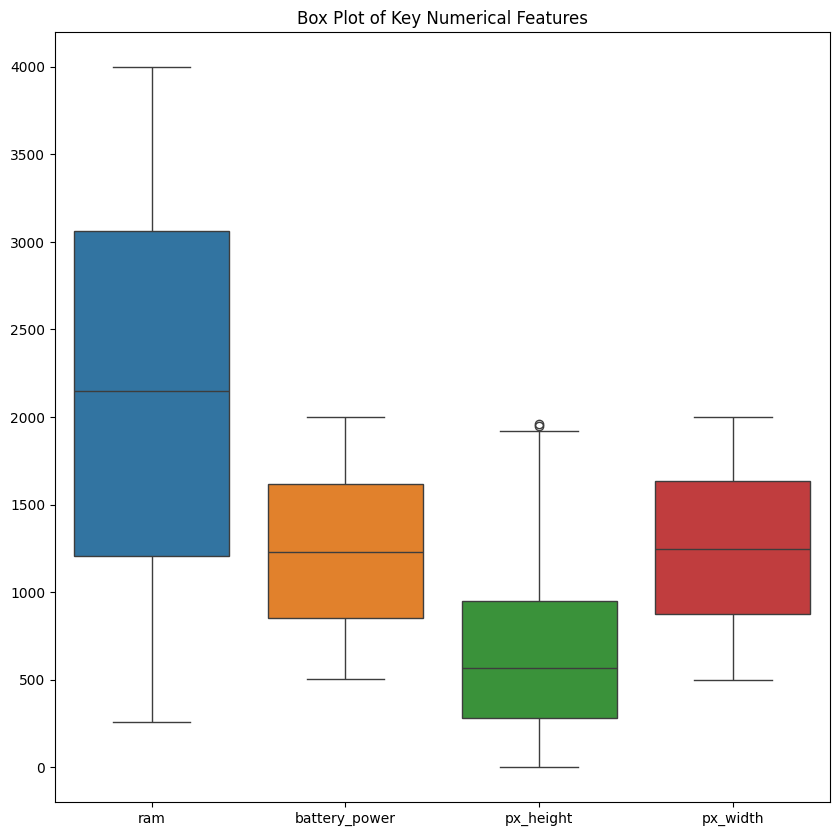

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
#sns.heatmap(df.corr(),annot=True)
sns.boxplot(data=df[['ram', 'battery_power', 'px_height', 'px_width']])
plt.title('Box Plot of Key Numerical Features')
plt.show()

Data Preperation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

numeric_features=[    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
    'sc_h', 'sc_w', 'talk_time']

df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('price_range',axis=1)
y=df['price_range']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Second split: validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

model=Sequential([Dense(128, activation ="relu", input_shape=(X_train.shape[1],)),
                  Dropout(0.3),
                  Dense(64, activation="relu"),
                  Dropout(0.3),
                  Dense(32, activation="relu"),
                  Dense(4, activation="softmax")])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.save('my_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience=5,
    restore_best_weights = True
)

# Corrected the keyword argument from 'valdation_data' to 'validation_data'
history = model.fit(X_train, y_train, epochs=50, batch_size=32 , validation_data =(X_val, y_val), callbacks=early_stopping)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2954 - loss: 1.3861 - val_accuracy: 0.5233 - val_loss: 1.3013
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4082 - loss: 1.2795 - val_accuracy: 0.6200 - val_loss: 1.0450
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5067 - loss: 1.0863 - val_accuracy: 0.7433 - val_loss: 0.7832
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5967 - loss: 0.8856 - val_accuracy: 0.7900 - val_loss: 0.6259
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6491 - loss: 0.7539 - val_accuracy: 0.8667 - val_loss: 0.5181
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6723 - loss: 0.6924 - val_accuracy: 0.8433 - val_loss: 0.4777
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7358 - loss: 0.6055 - val_accuracy: 0.8567 - val_loss: 0.4304
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7352 - loss: 0.5811 - val_accuracy: 0.8867 - val_loss

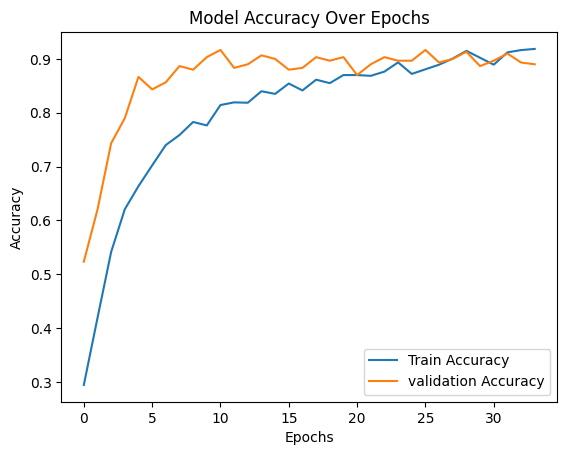

In [ ]:
# check the model's performance on the training
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# HIGHLIGHTS


*   no overfitting: since the validation accuarcy is higher than the train accuracy each time and there is no crossing of both



In [ ]:
#Evaluate on test set
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # convert probabilities to class labels
y_true = y_test

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average = 'weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.9133333333333333
Precision: 0.9166727829095787
Recall: 0.9133333333333333
F1 Score: 0.9123321850726107


In [ ]:
!pip install ipywidgets


In [ ]:
model.input_shape


(None, 20)

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('my_model.h5')

# Helper function to convert inputs
def to_numeric(val):
    if isinstance(val, str):
        return 1 if val.lower() == 'yes' else 0
    try:
        return float(val)
    except ValueError:
        return 0

# Create widgets for all 20 features
battery_power = widgets.FloatText(value=1000, description='Battery Power:')
blue = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], value=1, description='Blue:')
clock_speed = widgets.FloatText(value=1.5, description='Clock Speed:')
dual_sim = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], value=1, description='Dual SIM:')
fc = widgets.FloatText(value=5, description='Front Camera (MP):')
four_g = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], value=1, description='4G:')
int_memory = widgets.IntText(value=32, description='Internal Memory:')
m_dep = widgets.FloatText(value=0.5, description='Mobile Depth:')
mobile_wt = widgets.IntText(value=150, description='Mobile Weight:')
n_cores = widgets.IntText(value=4, description='Cores:')
px_height = widgets.IntText(value=1000, description='Pixel Height:')
px_width = widgets.IntText(value=1000, description='Pixel Width:')
ram = widgets.IntText(value=2000, description='RAM:')
sc_h = widgets.IntText(value=10, description='Screen Height:')
sc_w = widgets.IntText(value=5, description='Screen Width:')
talk_time = widgets.IntText(value=12, description='Talk Time:')
three_g = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], value=1, description='3G:')
touch_screen = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], value=1, description='Touch Screen:')
wifi = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], value=1, description='Wi-Fi:')

# New fields instead of padding
price_range = widgets.Dropdown(options=[(0, 0), (1, 1), (2, 2), (3, 3)], value=1, description='Price Range:')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict")
output = widgets.Output()

# Define the function for prediction
def on_button_click(b):
    with output:
        output.clear_output()
        try:
            # Prepare input data (match the order of dataframe columns)
            input_data = np.array([[
                to_numeric(battery_power.value), to_numeric(blue.value), to_numeric(clock_speed.value),
                to_numeric(dual_sim.value), to_numeric(fc.value), to_numeric(four_g.value),
                to_numeric(int_memory.value), to_numeric(m_dep.value), to_numeric(mobile_wt.value),
                to_numeric(n_cores.value), to_numeric(px_height.value), to_numeric(px_width.value),
                to_numeric(ram.value), to_numeric(sc_h.value), to_numeric(sc_w.value),
                to_numeric(talk_time.value), to_numeric(three_g.value), to_numeric(touch_screen.value),
                to_numeric(wifi.value), to_numeric(price_range.value)
            ]], dtype=np.float32)

            # Predict using the model
            pred = model.predict(input_data)
            pred_class = np.argmax(pred, axis=1)[0]

            # Display the predicted class
            print(f"📱 Predicted Class: {pred_class}")

        except Exception as e:
            print(f"❌ Error: {e}")

# Connect button to function
predict_button.on_click(on_button_click)

# Display the widgets
display(battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt,
        n_cores, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range)

display(predict_button, output)


FloatText(value=1000.0, description='Battery Power:')

Dropdown(description='Blue:', options=(('Yes', 1), ('No', 0)), value=1)

FloatText(value=1.5, description='Clock Speed:')

Dropdown(description='Dual SIM:', options=(('Yes', 1), ('No', 0)), value=1)

FloatText(value=5.0, description='Front Camera (MP):')

Dropdown(description='4G:', options=(('Yes', 1), ('No', 0)), value=1)

IntText(value=32, description='Internal Memory:')

FloatText(value=0.5, description='Mobile Depth:')

IntText(value=150, description='Mobile Weight:')

IntText(value=4, description='Cores:')

IntText(value=1000, description='Pixel Height:')

IntText(value=1000, description='Pixel Width:')

IntText(value=2000, description='RAM:')

IntText(value=10, description='Screen Height:')

IntText(value=5, description='Screen Width:')

IntText(value=12, description='Talk Time:')

Dropdown(description='3G:', options=(('Yes', 1), ('No', 0)), value=1)

Dropdown(description='Touch Screen:', options=(('Yes', 1), ('No', 0)), value=1)

Dropdown(description='Wi-Fi:', options=(('Yes', 1), ('No', 0)), value=1)

Dropdown(description='Price Range:', index=1, options=((0, 0), (1, 1), (2, 2), (3, 3)), value=1)

Button(description='Predict', style=ButtonStyle())

Output()

# Predicted Class	Meaning


*   0	: Low-cost phone
*   1	: Mid-range phone
*   2	: High-end phone
*   3	: Premium phone